# Aashia Mehta
# CS 7641: Machine Learning
# Project 4: Markov Decision Processes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import hiive.mdptoolbox.example as example
import hiive.mdptoolbox.mdp as mdp
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import seaborn as sns

# Sources:
# https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/example.py
# https://github.com/hiive/hiivemdptoolbox
# https://pymdptoolbox.readthedocs.io/en/latest/api/mdp.html

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'con

In [271]:
def plot_reward_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    rewards = [stat['Reward'] for stat in run_stats]
    plt.title("Reward vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Reward")
    print(rewards)
    print(iterations)
    plt.plot(iterations, rewards, label=label)
    plt.legend(loc='best')

In [276]:
def plot_time_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    time = [stat['Time'] for stat in run_stats]
    plt.title("Time vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Time")
    print("TIME: ", time)
    plt.plot(iterations, time, label=label)
    plt.legend(loc='best')

In [294]:
def plot_convergence_iterations(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    error = [stat['Error'] for stat in run_stats]
    plt.title("Error vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.plot(iterations, error, label=label)
    plt.legend(loc='best')

In [259]:
def plot_convergence_iterations_mean_V(run_stats, title, label):
    iterations = [stat['Iteration'] for stat in run_stats]
    mean_V = [stat['Mean V'] for stat in run_stats]
    plt.title("Change in Mean V vs. Iteration \n(" + title + ")")
    plt.xlabel("Iterations")
    plt.ylabel("Change in Mean V")
    plt.plot(iterations, mean_V, label=label)
    plt.legend(loc='best')

[0.3333333333333333, 0.4333333333333333, 0.5233333333333333, 0.5683333333333332, 0.6061333333333332, 0.6288133333333332, 0.6475243333333333, 0.6599902333333332, 0.6702035233333332, 0.6774796723333333, 0.6834318115333333, 0.6878663914333334, 0.6914982592273333, 0.6942878993245334]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0.3333333333333333, 0.4388888888888889, 0.5391666666666666, 0.592091049382716, 0.6390173353909464, 0.6687373165294923, 0.694618466770976, 0.712819301648591, 0.7285596532927505, 0.7403963752589919, 0.7506171552002658, 0.7586550911009514, 0.7656037850088103, 0.7712375979470727, 0.7761180499320937, 0.7801588921792797, 0.7836663367205745, 0.7866129643481105, 0.7891745050935403]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.3333333333333333, 0.4433333333333333, 0.5522333333333334, 0.6121283333333333, 0.6674713133333332, 0.7039976801333332, 0.7371453580043332, 0.7614378705012232, 0.783330964658508, 0.80048774339243, 0.8159260595638956, 0.82857

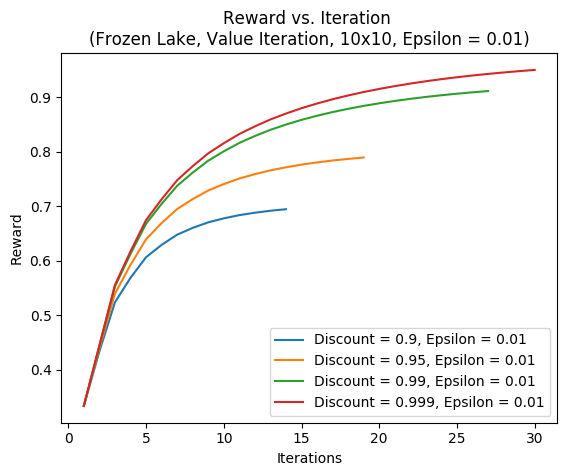

[0.3333333333333333, 0.4333333333333333, 0.5233333333333333, 0.5683333333333332, 0.6061333333333332, 0.6288133333333332, 0.6475243333333333, 0.6599902333333332, 0.6702035233333332, 0.6774796723333333, 0.6834318115333333, 0.6878663914333334, 0.6914982592273333, 0.6942878993245334, 0.6965773152660732, 0.6983731048919682, 0.6998498083069663, 0.7010251025992162, 0.7019930272336454, 0.7027712609690937, 0.703412823045911, 0.7039323488379283, 0.7043608852354056, 0.7047096585761884, 0.7049974309019711, 0.7052324782959785]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[0.3333333333333333, 0.4388888888888889, 0.5391666666666666, 0.592091049382716, 0.6390173353909464, 0.6687373165294923, 0.694618466770976, 0.712819301648591, 0.7285596532927505, 0.7403963752589919, 0.7506171552002658, 0.7586550911009514, 0.7656037850088103, 0.7712375979470727, 0.7761180499320937, 0.7801588921792797, 0.7836663367205745, 0.7866129643481105, 0.7891745050935403, 0.7913

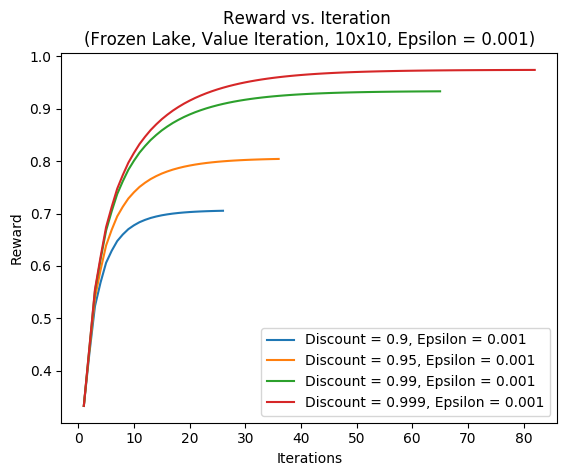

<Figure size 640x480 with 0 Axes>

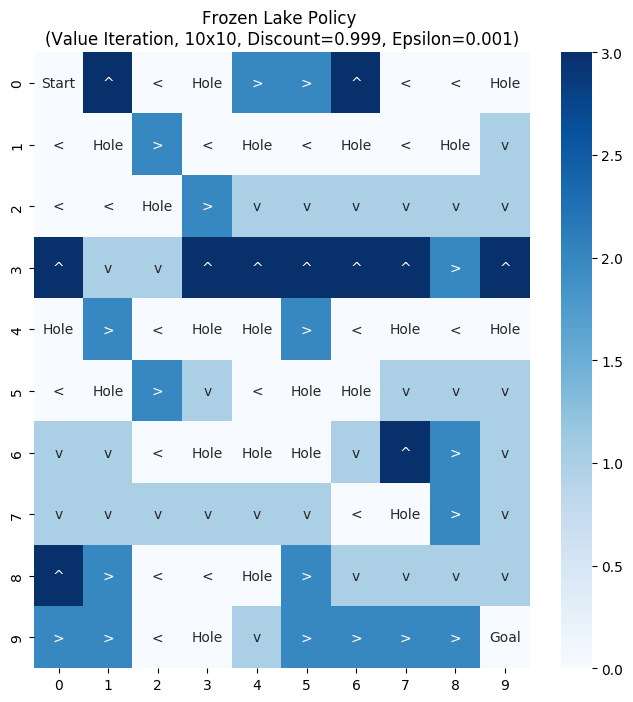

[0.3333333333333333, 0.4333333333333333, 0.5233333333333333]
[1, 2, 3]
[0.3333333333333333, 0.4388888888888889, 0.5391666666666666, 0.592091049382716]
[1, 2, 3, 4]
[0.3333333333333333, 0.4433333333333333, 0.5522333333333334, 0.6121283333333333, 0.6674713133333332]
[1, 2, 3, 4, 5]
[0.3333333333333333, 0.4443333333333333, 0.5552223333333333, 0.6167657283333332, 0.6741487898313332]
[1, 2, 3, 4, 5]


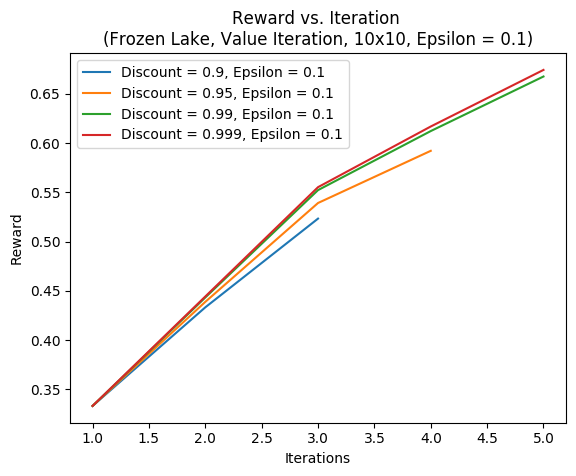

In [283]:
# FROZEN LAKE: VALUE ITERATION (10)
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        frozen_lake_vi_10_time = vi.time
        print("FROZEN LAKE (10) VI TIME: ", frozen_lake_vi_10_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Value Iteration, 10x10, Discount=0.999, Epsilon=0.001)', random_map, policy, 10, figsize=8)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

[0.3333333333333333, 0.4333333333333333, 0.4933333333333333, 0.5293333333333333, 0.5536333333333333, 0.5706433333333334, 0.5827933333333333, 0.5915413333333333, 0.5978617633333333]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.3333333333333333, 0.4388888888888889, 0.5057407407407407, 0.5480802469135801, 0.5782471450617284, 0.6005371309156378, 0.617343072630887, 0.6301155883344763, 0.6398564055189776, 0.6472957158981212, 0.6529806867517002]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.3333333333333333, 0.4433333333333333, 0.5159333333333332, 0.5638493333333332, 0.5994269633333332, 0.6268217384333332, 0.6483462045833333, 0.6653935817741332, 0.6789419847965216, 0.6897249196725753, 0.6983119725166247, 0.7051520042648156, 0.710600999310167]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[0.3333333333333333, 0.4444444433333333, 0.5185185159259259, 0.5679012304938271, 0.6049382660493827, 0.6337448489711934, 0.6566072161408323, 0.6748971096936442, 0.6895798296489357, 0.7013835847890735, 0.7108785230708397, 0.71851812

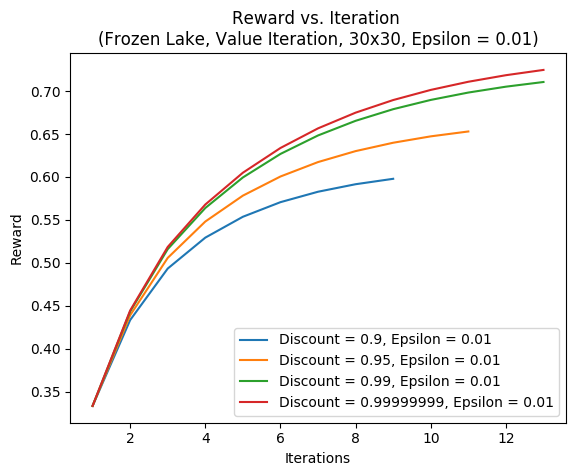

[0.3333333333333333, 0.4333333333333333, 0.4933333333333333, 0.5293333333333333, 0.5536333333333333, 0.5706433333333334, 0.5827933333333333, 0.5915413333333333, 0.5978617633333333, 0.6024347803333333, 0.6057454609333333, 0.6081428503333333, 0.6098790680803332, 0.6111365106304333, 0.6120472198144933, 0.6127068103714692, 0.6131845270973296]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
[0.3333333333333333, 0.4388888888888889, 0.5057407407407407, 0.5480802469135801, 0.5782471450617284, 0.6005371309156378, 0.617343072630887, 0.6301155883344763, 0.6398564055189776, 0.6472957158981212, 0.6529806867517002, 0.6573260955075968, 0.6606479250359807, 0.6631873910104572, 0.6651287911573143, 0.666612985825799, 0.6677476516668787, 0.6686151040301327, 0.6692782719541642, 0.6697852643931421, 0.6701728605759394]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0.3333333333333333, 0.4433333333333333, 0.5159333333333332, 0.5638493333333332, 0.5994269633333332, 0.6

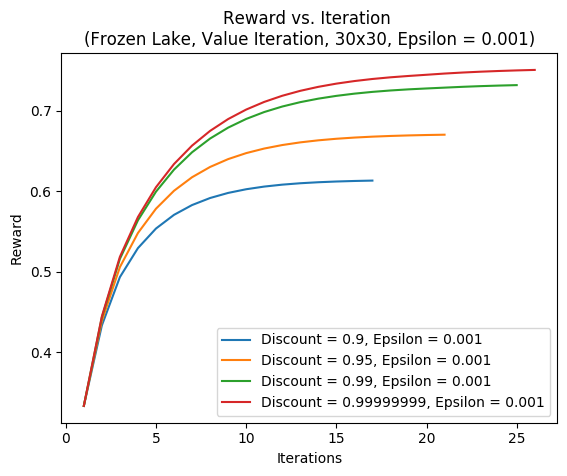

<Figure size 640x480 with 0 Axes>

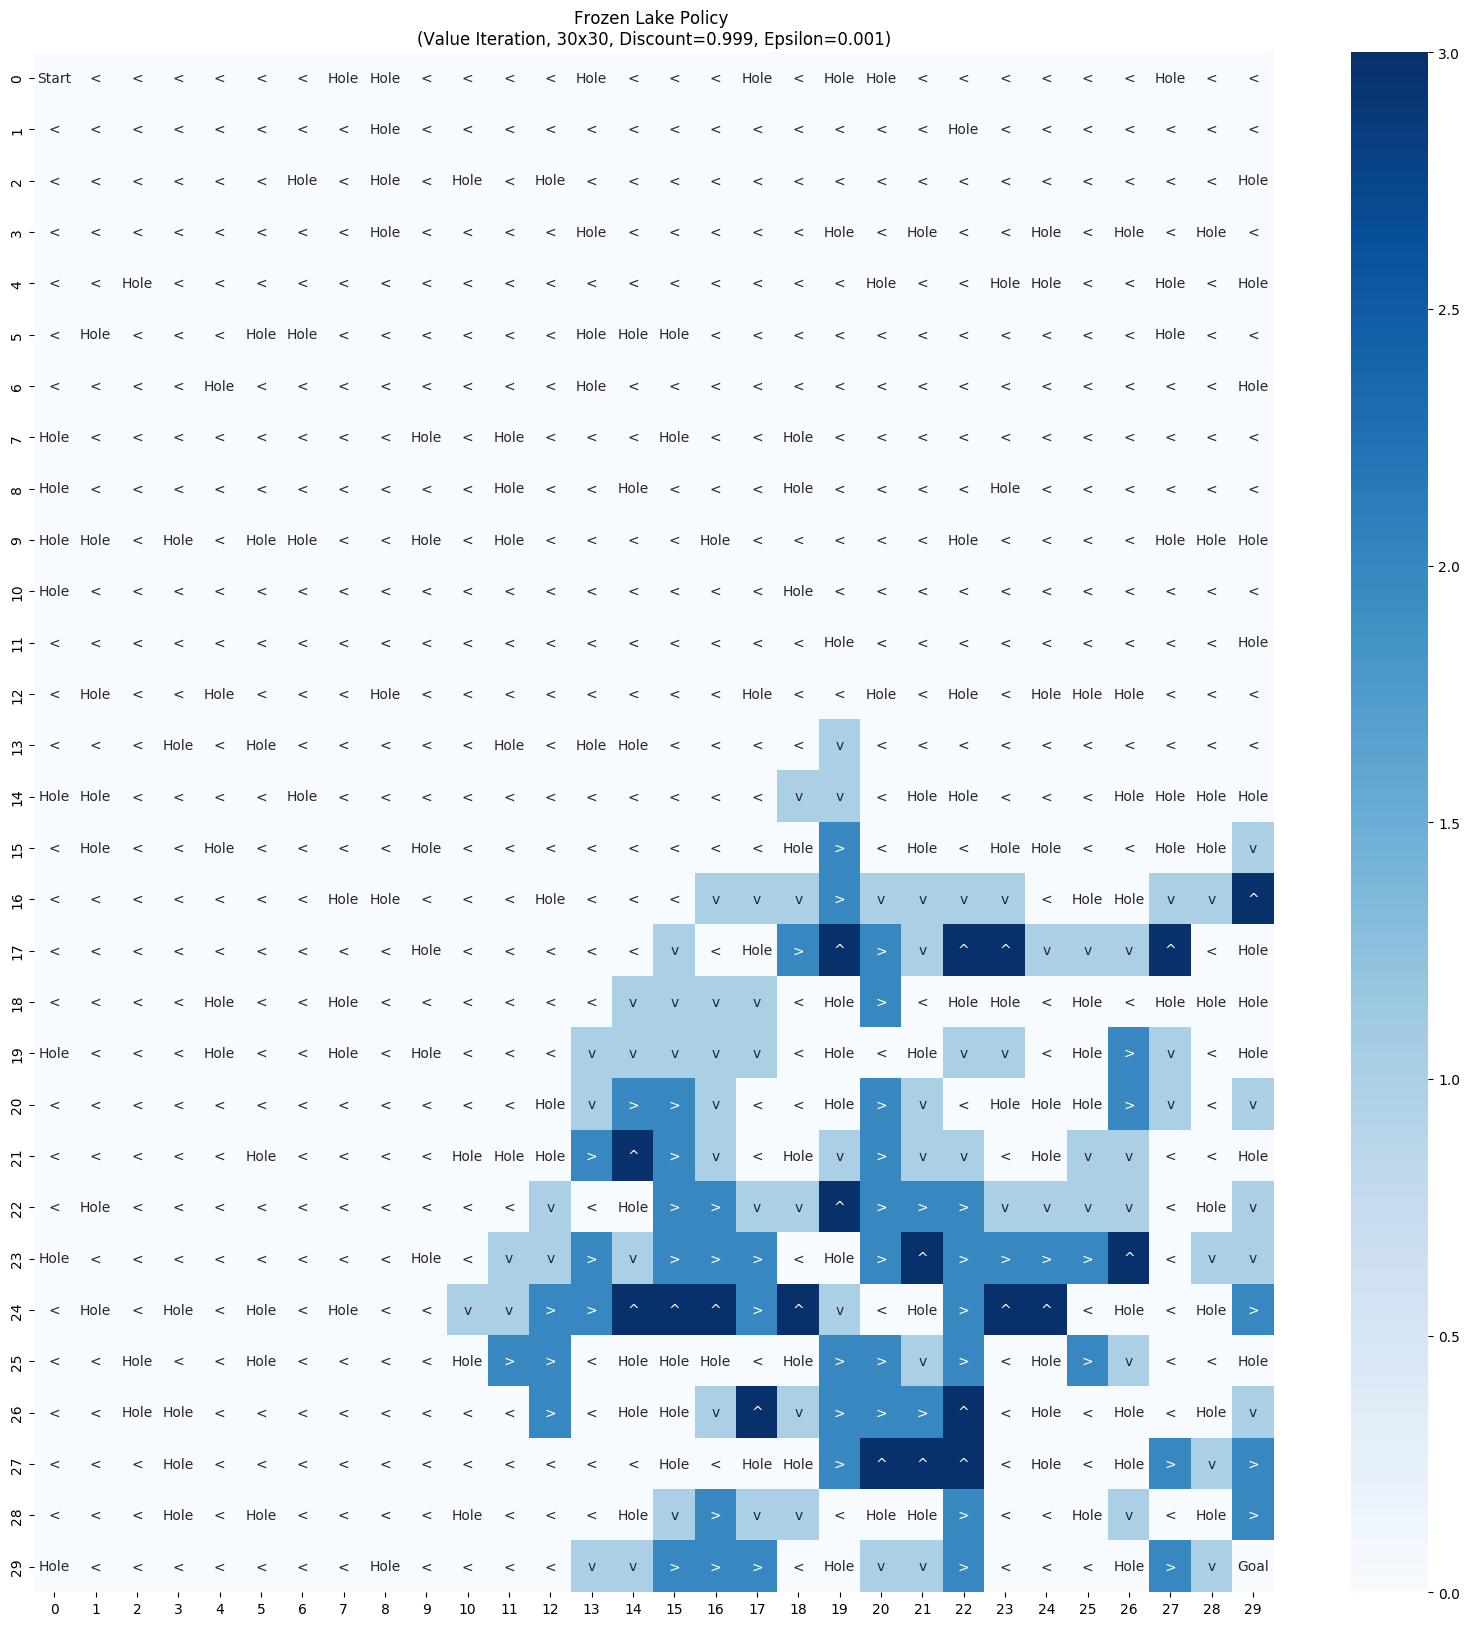

[0.3333333333333333, 0.4333333333333333]
[1, 2]
[0.3333333333333333, 0.4388888888888889, 0.5057407407407407]
[1, 2, 3]
[0.3333333333333333, 0.4433333333333333, 0.5159333333333332]
[1, 2, 3]
[0.3333333333333333, 0.4444444433333333, 0.5185185159259259]
[1, 2, 3]


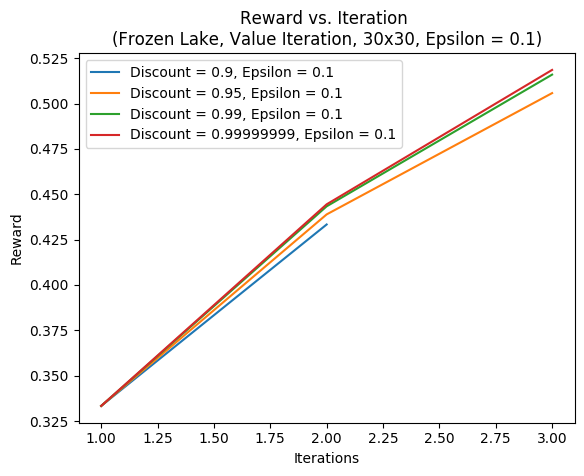

In [288]:
# FROZEN LAKE: VALUE ITERATION (30)
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.99999999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.99999999:
        policy = vi.policy
        frozen_lake_vi_30_time = vi.time
        print("FROZEN LAKE (30) VI TIME: ", frozen_lake_vi_30_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Value Iteration, 30x30, Discount=0.999, Epsilon=0.001)', random_map, policy, 30, figsize=20)
    
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

[0.3333333333333333, 0.19999999999999998, 0.09000000000000002, 0.08099999999999996, 0.0567, 0.042120000000000046, 0.03450600000000001, 0.025369200000000022, 0.02237301, 0.018193653000000004, 0.015112607400000033, 0.012836071620000028, 0.010552646789999981, 0.009255895320599977, 0.0075827915067600005, 0.0065138920003170175, 0.0053328946871502025, 0.0045221290681396464, 0.003703882187299612, 0.003114338062578298, 0.002552921189667434, 0.002134426354111152, 0.0017512315054416527, 0.0014584875245048368, 0.0011976654004249299, 0.0009947917845674892]
[0.3333333333333333, 0.21111111111111108, 0.10027777777777776, 0.09526388888888881, 0.07038942901234566, 0.05519425068587103, 0.04772887447130775, 0.037040295540409246, 0.034480470518148176, 0.029597141580151032, 0.0259507765836976, 0.02326613190533977, 0.02018991786611829, 0.018692727733852776, 0.016164581188455374, 0.014657401740679754, 0.012666614141859045, 0.01133761180951054, 0.009802049458773554, 0.008699746034680822, 0.007527648384439312,

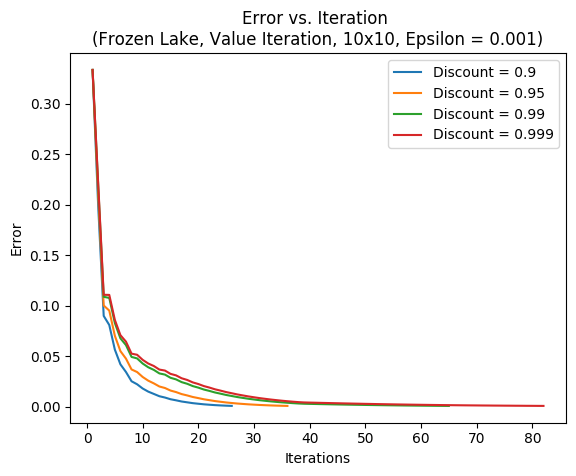

[0.3333333333333333, 0.09999999999999999, 0.06, 0.04500000000000001, 0.03240000000000001, 0.02349000000000001, 0.017010000000000025, 0.012320099999999945, 0.008922960000000035, 0.00665285399999993, 0.004871542499999992, 0.003709458180000069, 0.002742589853999944, 0.002080591515000063, 0.0015461744453999504, 0.0011691058956390665, 0.0008710676181233334]
[0.3333333333333333, 0.10555555555555557, 0.06685185185185186, 0.05292438271604935, 0.0402225308641975, 0.03078140903635118, 0.023528318401348836, 0.017987959615888394, 0.0137517419075312, 0.010822755702226183, 0.008365221678126034, 0.006723610296685223, 0.005247277293994379, 0.004201855073782068, 0.003296050317604271, 0.002630693721809352, 0.0020689471773787105, 0.001646682116261844, 0.0012965771080878374, 0.0010295320068415825, 0.0008109380312869563]
[0.3333333333333333, 0.10999999999999999, 0.07259999999999997, 0.059894999999999976, 0.04743684000000001, 0.03783087989999995, 0.030134252610000023, 0.02400838954371004, 0.0191271572080775

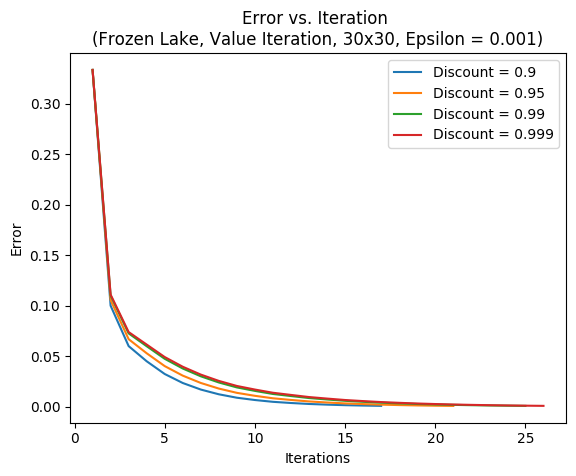

In [285]:
# FROZEN LAKE: VALUE ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 10x10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FROZEN LAKE: VALUE ITERATION (30) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Frozen Lake, Value Iteration, 30x30, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

[0.4761904760059902, 0.68590543614811, 0.7060461525229977, 0.7061491542795548, 0.7061539220754393, 0.7061589401199494, 0.7063202426810611, 0.7063217736493508, 0.706322015442775, 0.7063222660254751]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.4878048780328988, 0.7726126860706166, 0.8042671034499841, 0.8046852305665921, 0.8047132591350167, 0.8047369525258569, 0.805450861041715, 0.8054644465739875, 0.805469197780796, 0.805472861981962]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.4975124378107945, 0.888583270034929, 0.92871908739306, 0.930225994307109, 0.9303583578963865, 0.9304707918845463, 0.933246917036882, 0.9333402130748987, 0.9334039350977144, 0.9335138965246066, 0.9335138965246066]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.49975012493753035, 0.9278917418568671, 0.9672080084694961, 0.9692814651285704, 0.9694759244235758, 0.9696418254635057, 0.9735420342124317, 0.9736944067986399, 0.9738197841527796, 0.974167509180899, 0.9741908459289401, 0.9741908459289401]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
FROZEN 

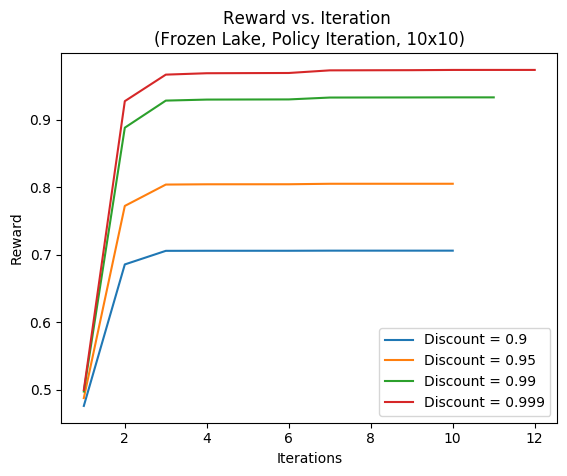

<Figure size 640x480 with 0 Axes>

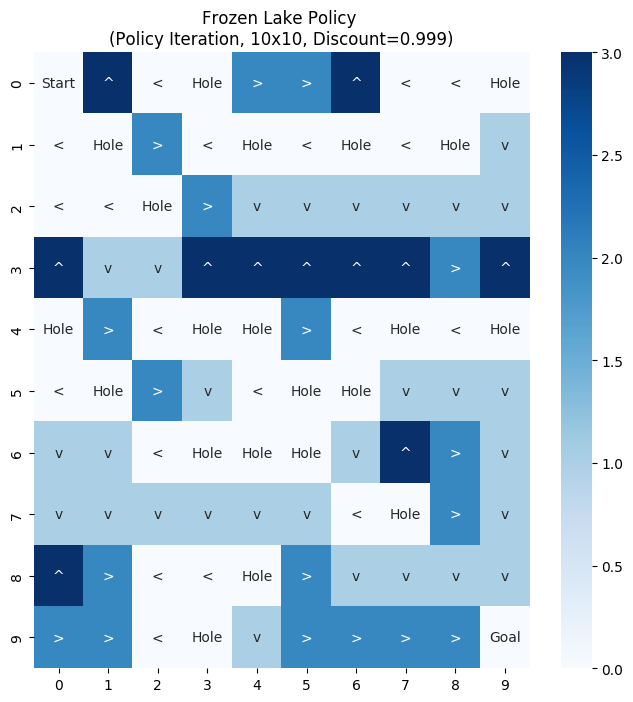

[0.4761904002703333, 0.6144203904995238, 0.6144293923280079, 0.6144293923280079, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242, 0.6144321308790242]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
[0.48780486229875, 0.6714211015253625, 0.6714266406134458, 0.6714284997794153, 0.6714308095964401, 0.6714307156027748, 0.6714309783887817, 0.6714310538088369, 0.6714310791231843, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.6714310875081426, 0.67

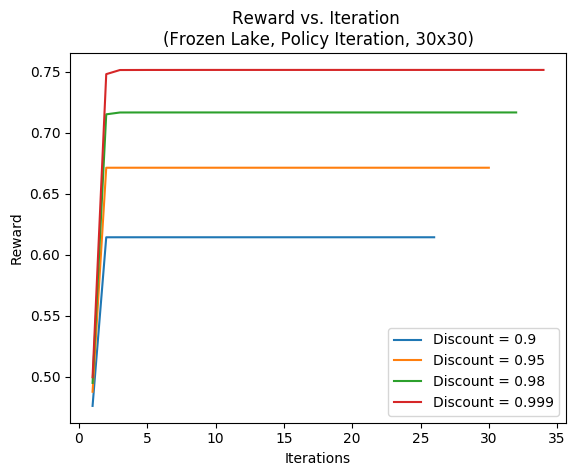

<Figure size 640x480 with 0 Axes>

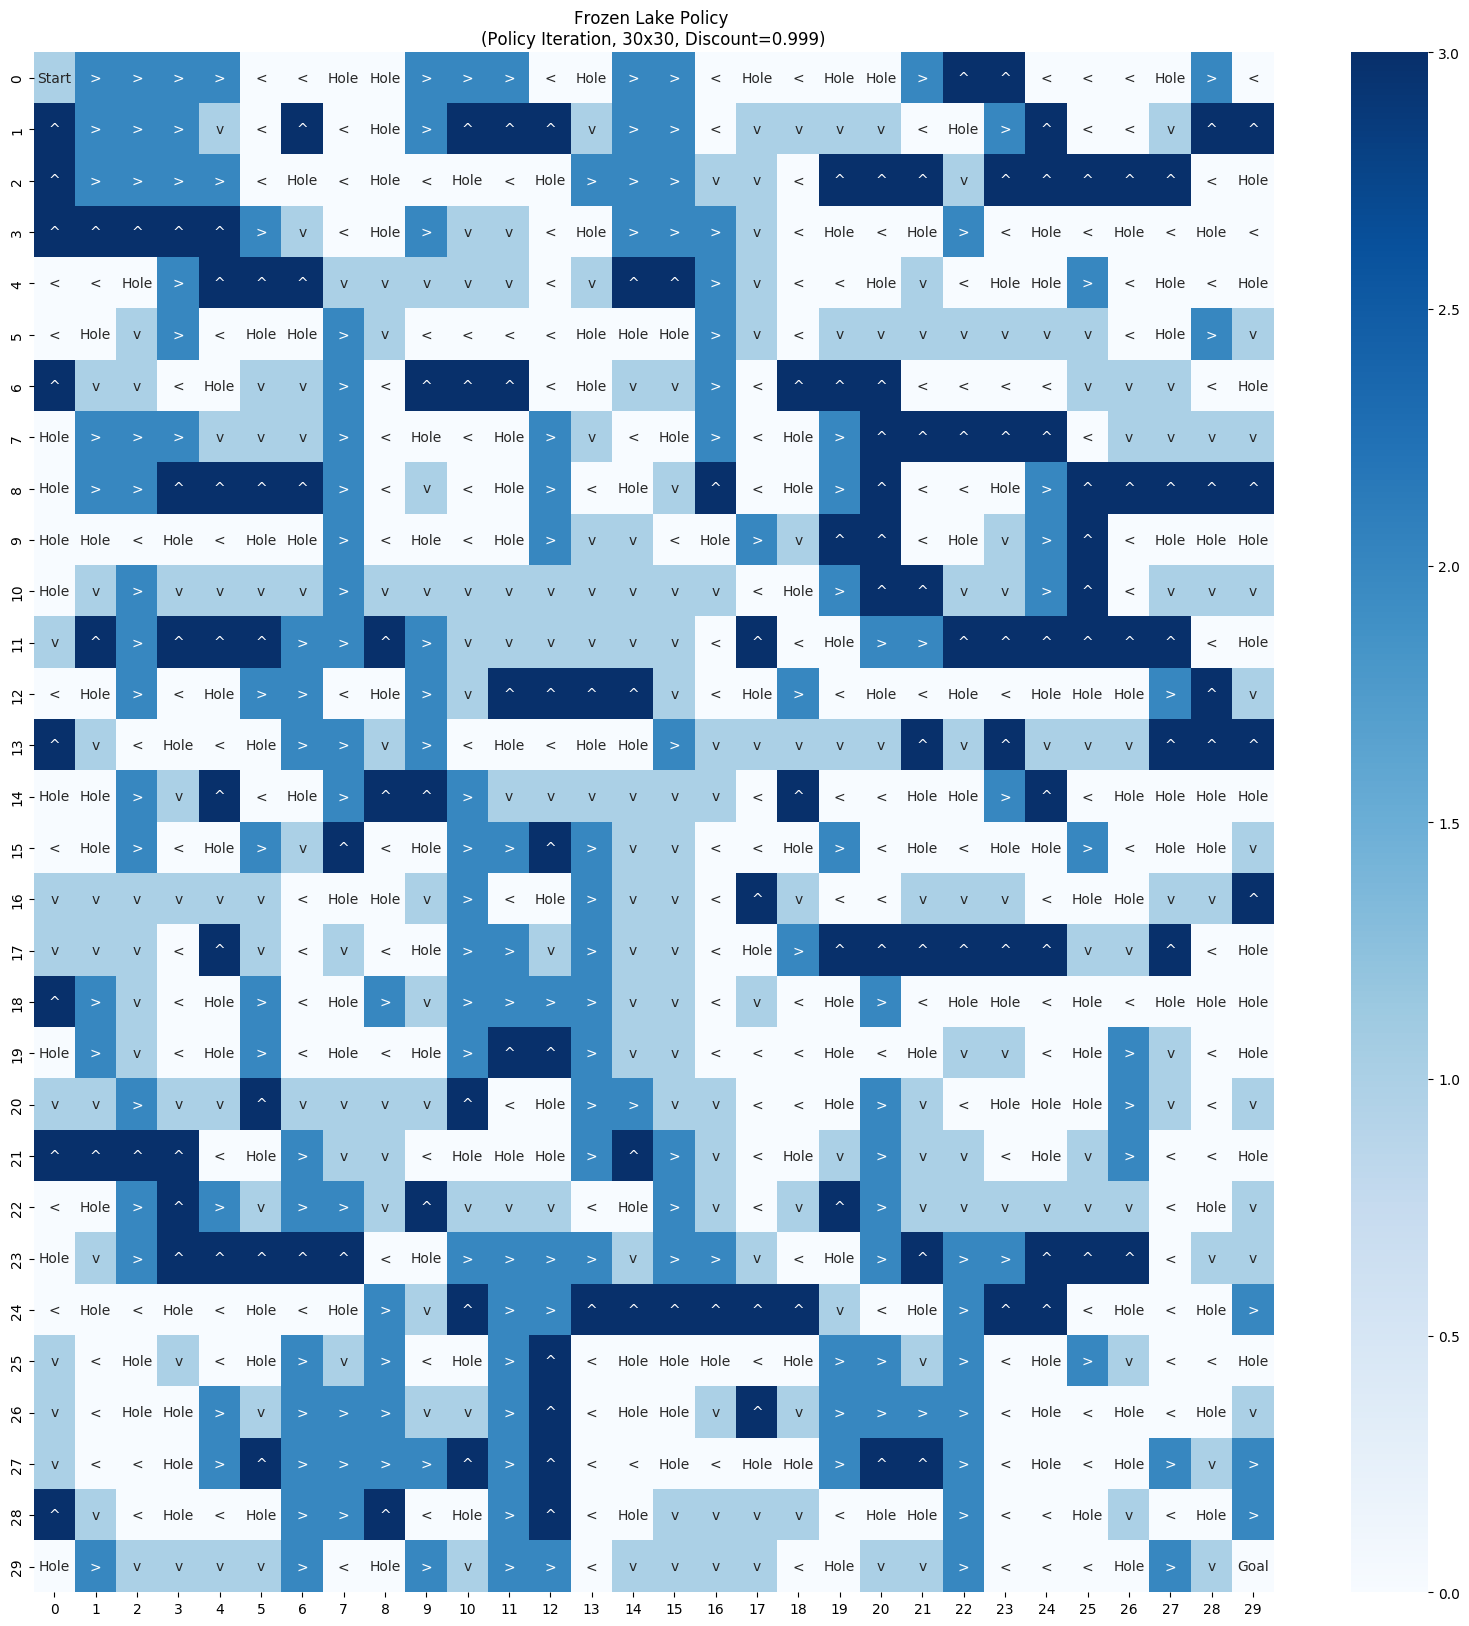

In [280]:
# FROZEN LAKE: POLICY ITERATION (10)
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 10x10", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        frozen_lake_pi_10_time = pi.time
        print("FROZEN LAKE (10) PI TIME: ", frozen_lake_pi_10_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Policy Iteration, 10x10, Discount=0.999)', random_map, policy, 10, figsize=8)
plt.show()
plt.close()

# FROZEN LAKE: POLICY ITERATION (30)
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.98, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 30x30", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        frozen_lake_pi_30_time = pi.time
        print("FROZEN LAKE (30) PI TIME: ", frozen_lake_pi_30_time)
        create_frozen_lake_map('Frozen Lake Policy \n(Policy Iteration, 30x30, Discount=0.999)', random_map, policy, 30, figsize=20)
plt.show()
plt.close()

[0.14285714280179704, 0.08818720721777225, 0.05787491756080625, 0.0382419371192643, 0.01101698462264003, 0.003261347614281289, 0.001264861302407999, 0.0006774209579338177, 0.0001845082079568825, 8.960836110977893e-06]
[0.15447154471041794, 0.11337903578189884, 0.08738333042423978, 0.06799924269669498, 0.020754091429162458, 0.00809875131790857, 0.003473725208006352, 0.002261225865404521, 0.0007744347374302775, 4.701177224158276e-06]
[0.16417910447756218, 0.14442786907636723, 0.1272977301609339, 0.11520416790482946, 0.03810845950719181, 0.018308033146408272, 0.00856858718685693, 0.0068363169791584785, 0.002959694858587457, 0.0006366119765029224, 9.760002563086179e-07]
[0.1664167916041976, 0.15426234283079499, 0.13989194965411855, 0.13147752252950307, 0.0455831105833226, 0.022386506187762688, 0.010701191943804426, 0.00904711780237065, 0.004317967729881257, 0.0019161946907022137, 9.79448011029227e-08, 9.79448011029227e-08]


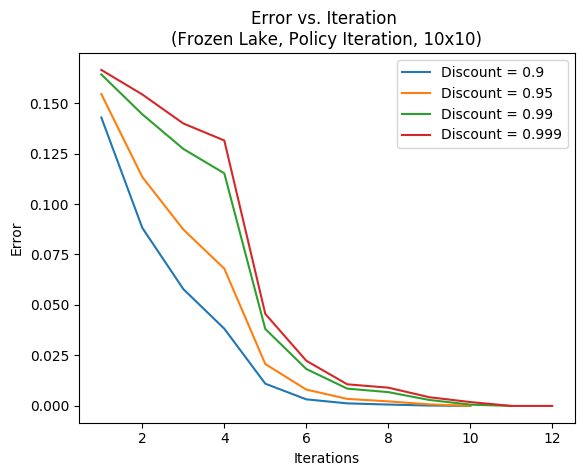

[0.12121206243583976, 0.017107376795778534, 0.00027523214298467573, 2.7733020989359394e-05, 1.154377655465666e-05, 1.1543869667063333e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05, 1.1543890828885628e-05]
[0.15447153972793748, 0.04341267878487449, 0.0018328316326811046, 0.0003131240099825505, 0.00021763969575214952, 0.00015093945797076835, 0.00012931845645692538, 9.432071452716812e-05, 6.677600174286345e-05, 4.6119537252965135e-05, 2.3042086097238606e-05, 1.2939907364123611e-05, 9.558955147243269e-06, 6.566828207228379e-06, 4.881822742828926e-06, 4.882007563939057e-06, 4.882043264716135e-06, 4.882043741159347e-06, 4.882045255969326e-06, 4.882045298340706e-06, 4.8820452984868565e-06, 4.882045298608179e-06, 4.882045298608504e-06, 4.882045298608504e-06, 4.882045298608504e-06, 4.882045298608504e-06, 4.882045298608504e-

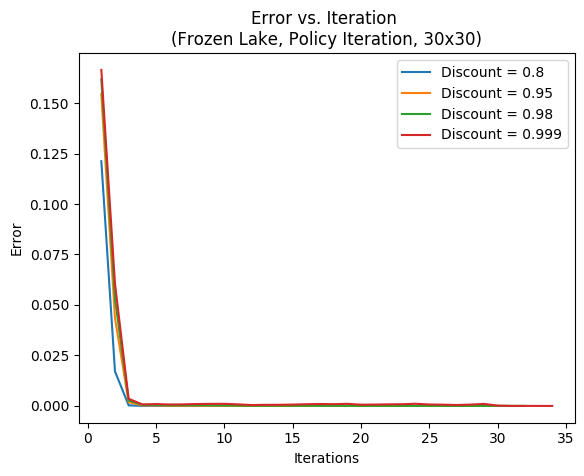

In [282]:
# FROZEN LAKE: POLICY ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 10x10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FROZEN LAKE: POLICY ITERATION (30) CONVERGENCE PLOT
np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)

discounts = [0.8, 0.95, 0.98, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Frozen Lake, Policy Iteration, 30x30", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

In [70]:
def create_frozen_lake_map(title, random_map, policy, size, figsize):
    random_map_reshaped = []
    for string in random_map:
        random_map_reshaped.append(list(string))
    random_map_reshaped = np.array(random_map_reshaped)
    # print(random_map_reshaped)

    policy_reshaped = np.reshape(policy, (size, size))
    # print(policy_reshaped)

    policy_arrows = policy_reshaped.astype(str)
    policy_arrows[policy_arrows=='0'] = '<'
    policy_arrows[policy_arrows=='1'] = 'v'
    policy_arrows[policy_arrows=='2'] = '>'
    policy_arrows[policy_arrows=='3'] = '^'
    policy_arrows[random_map_reshaped=='S'] = 'Start'
    policy_arrows[random_map_reshaped=='G'] = 'Goal'
    policy_arrows[random_map_reshaped=='H'] = 'Hole'
    # print(policy_arrows)

    plt.figure()
    fig, ax = plt.subplots(figsize=(figsize, figsize))
    ax.set_title(title)
    heatmap = sns.heatmap(policy_reshaped, annot=policy_arrows, fmt='', cmap='Blues', ax=ax)
    plt.show()
    plt.close()

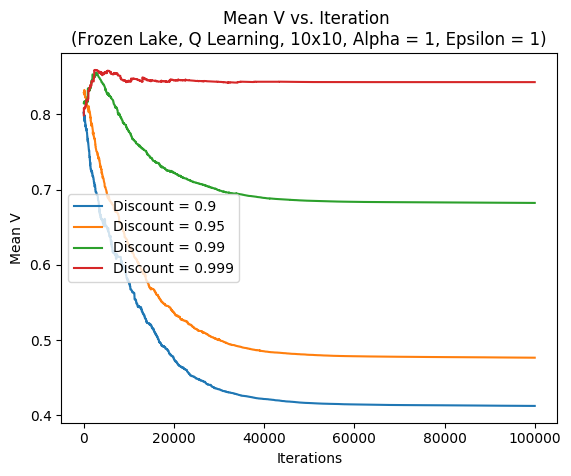

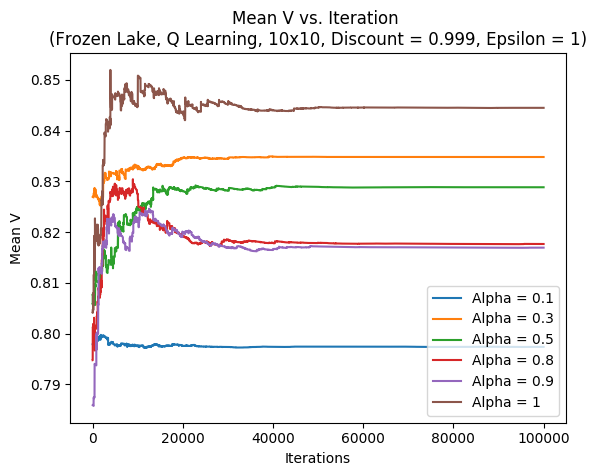

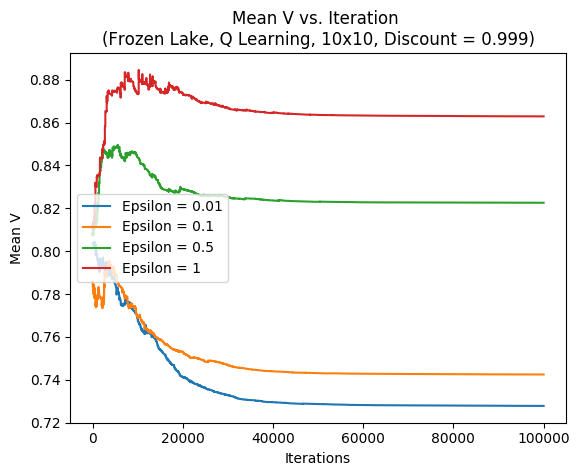

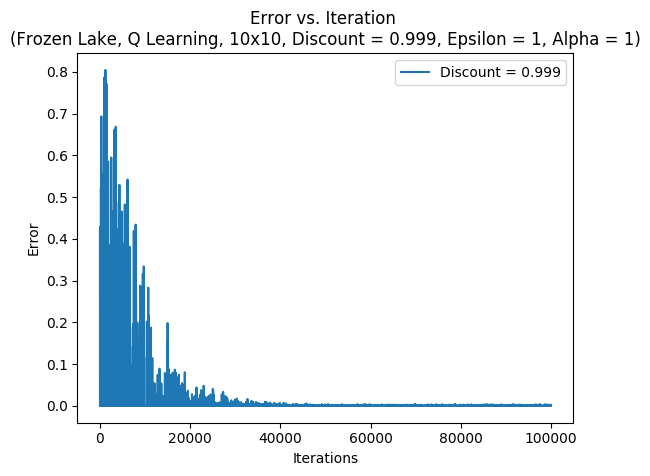

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

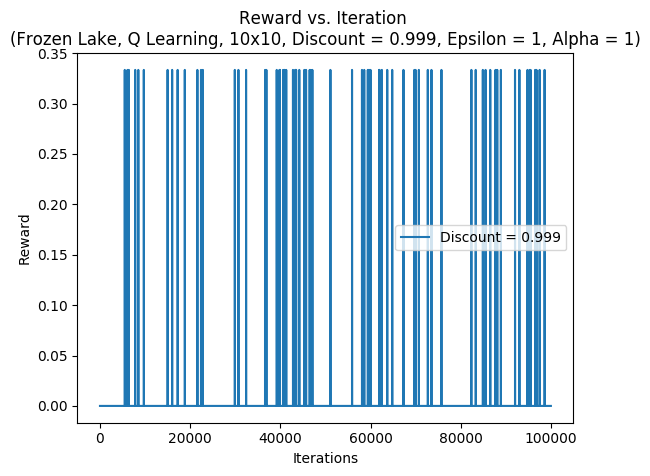

FROZEN LAKE (10) QL TIME:  4.938481092453003


<Figure size 640x480 with 0 Axes>

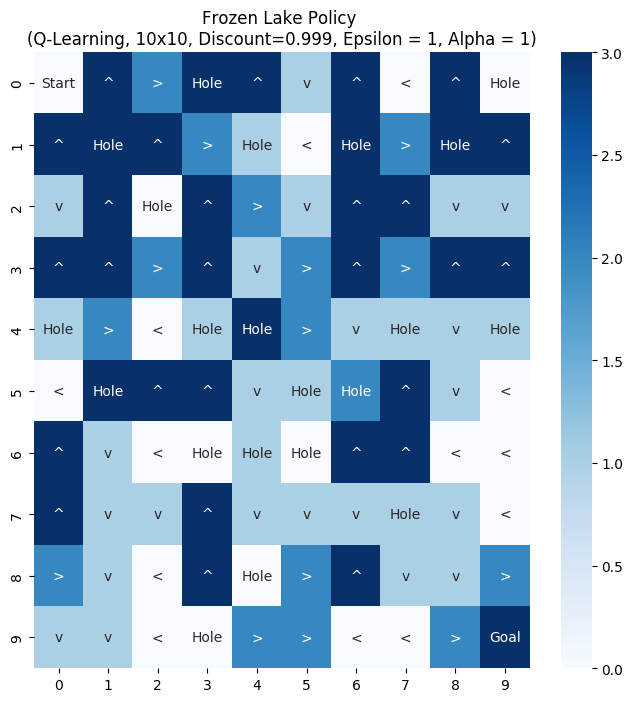

In [299]:
# FROZEN LAKE: Q LEARNING (10)

np.random.seed(0)
random_map = generate_random_map(size=10)
P, R = example.openai("FrozenLake-v1", desc=random_map)
discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 10x10, Alpha = 1, Epsilon = 1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 10x10, Discount = 0.999, Epsilon = 1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

epsilons = [0.01, 0.1, 0.5, 1]
for i in range(len(epsilons)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=epsilons[i], epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 10x10, Discount = 0.999)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Epsilon = " + str(epsilons[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 1, alpha_min=0.01, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.random_sample(ql.Q.shape)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Frozen Lake, Q Learning, 10x10, Discount = 0.999, Epsilon = 1, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Frozen Lake, Q Learning, 10x10, Discount = 0.999, Epsilon = 1, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
frozen_lake_ql_10_time = ql.time
print("FROZEN LAKE (10) QL TIME: ", frozen_lake_ql_10_time)
create_frozen_lake_map('Frozen Lake Policy \n(Q-Learning, 10x10, Discount=0.999, Epsilon = 1, Alpha = 1)', random_map, policy, 10, figsize=8)

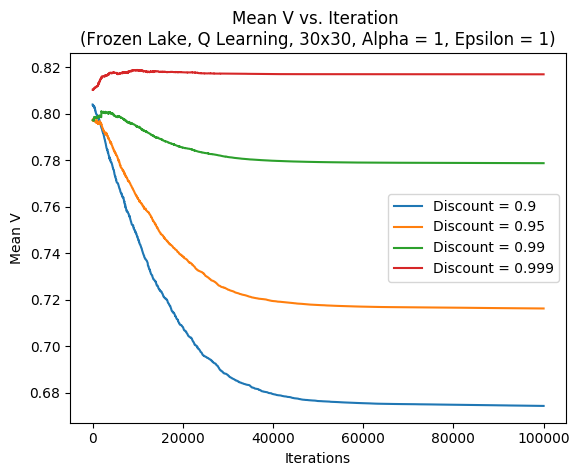

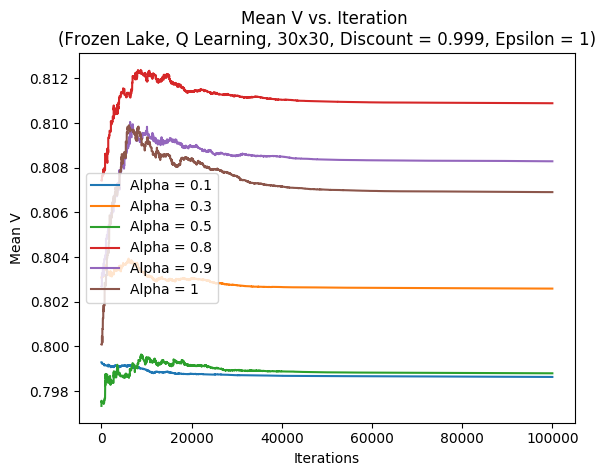

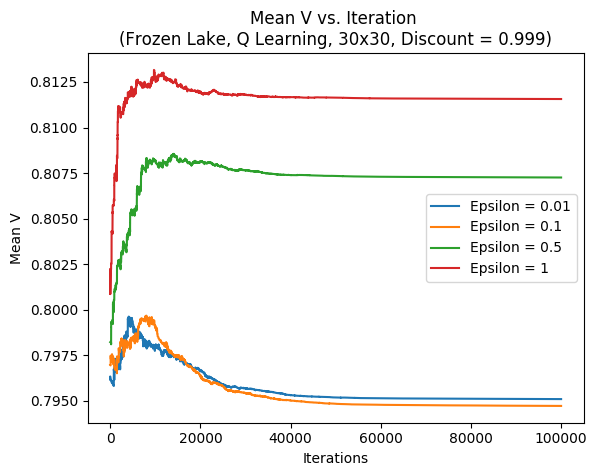

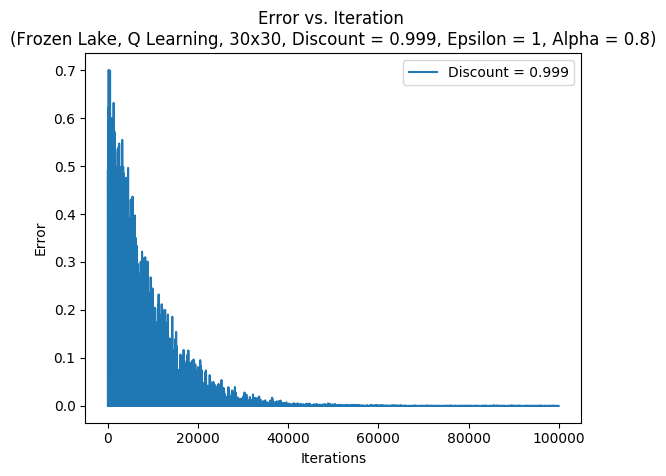

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

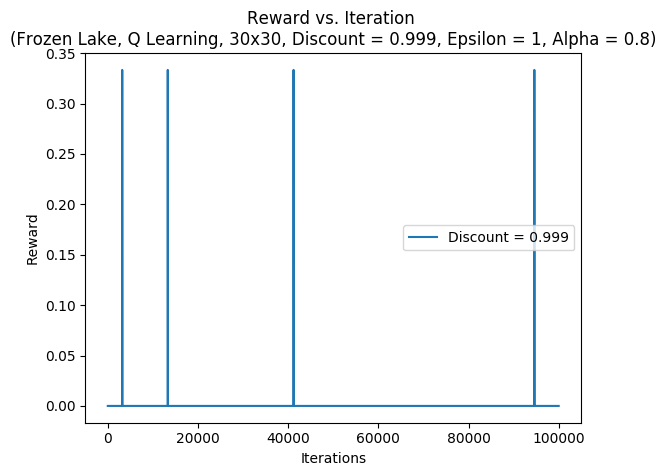

FROZEN LAKE (30) QL TIME:  24.97431492805481


<Figure size 640x480 with 0 Axes>

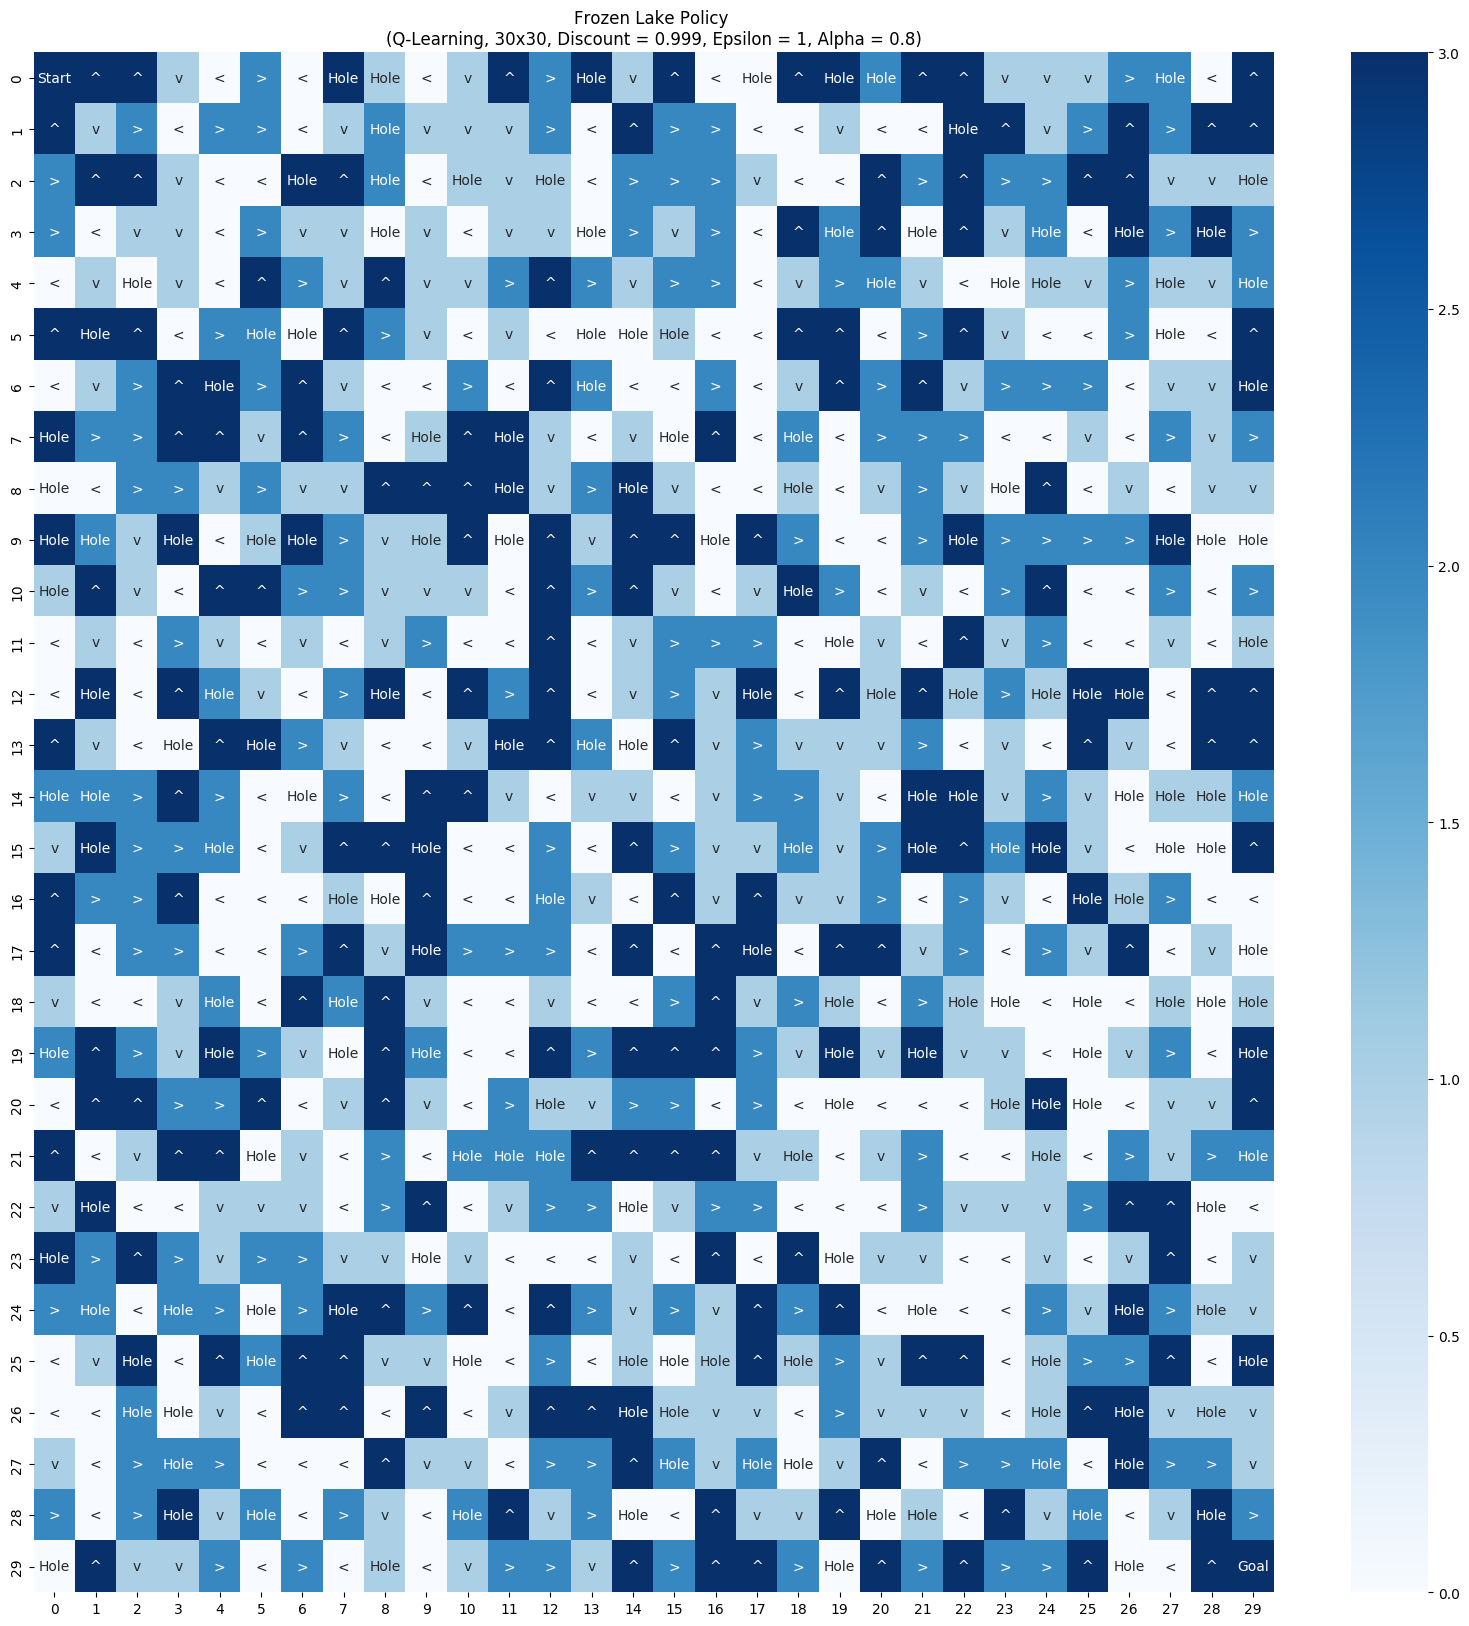

In [301]:
# FROZEN LAKE: Q LEARNING (30)

np.random.seed(0)
random_map = generate_random_map(size=30)
P, R = example.openai("FrozenLake-v1", desc=random_map)
discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 30x30, Alpha = 1, Epsilon = 1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.random_sample(ql.Q.shape)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 30x30, Discount = 0.999, Epsilon = 1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

epsilons = [0.01, 0.1, 0.5, 1]
for i in range(len(epsilons)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=epsilons[i], epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Frozen Lake, Q Learning, 30x30, Discount = 0.999)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Epsilon = " + str(epsilons[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 0.8, alpha_min=0.001, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.random_sample(ql.Q.shape)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Frozen Lake, Q Learning, 30x30, Discount = 0.999, Epsilon = 1, Alpha = 0.8", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Frozen Lake, Q Learning, 30x30, Discount = 0.999, Epsilon = 1, Alpha = 0.8", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
frozen_lake_ql_30_time = ql.time
print("FROZEN LAKE (30) QL TIME: ", frozen_lake_ql_30_time)
create_frozen_lake_map('Frozen Lake Policy \n(Q-Learning, 30x30, Discount = 0.999, Epsilon = 1, Alpha = 0.8)', random_map, policy, 30, figsize=20)

In [201]:
print("FROZEN LAKE (10) PI TIME: ", frozen_lake_vi_10_time)
print("FROZEN LAKE (30) PI TIME: ", frozen_lake_vi_30_time)
print("FROZEN LAKE (10) VI TIME: ", frozen_lake_pi_10_time)
print("FROZEN LAKE (30) VI TIME: ", frozen_lake_pi_30_time)
print("FROZEN LAKE (10) QL TIME: ", frozen_lake_ql_10_time)
print("FROZEN LAKE (30) QL TIME: ", frozen_lake_ql_30_time)

FROZEN LAKE (10) PI TIME:  0.018112897872924805
FROZEN LAKE (30) PI TIME:  0.02667093276977539
FROZEN LAKE (10) VI TIME:  0.17728686332702637
FROZEN LAKE (30) VI TIME:  6.48161506652832
FROZEN LAKE (10) QL TIME:  5.152400255203247
FROZEN LAKE (30) QL TIME:  24.322376012802124


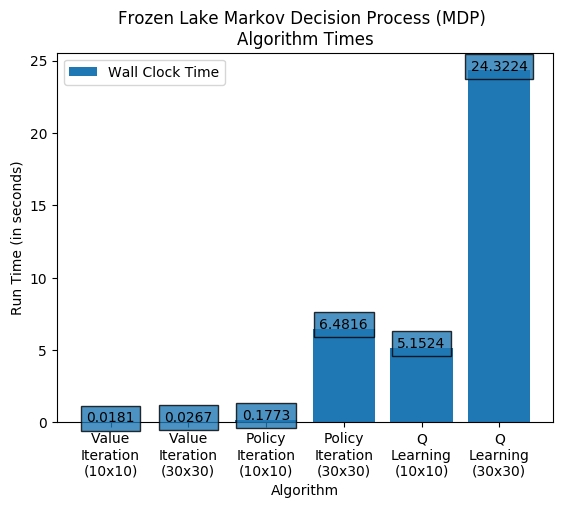

In [210]:
from textwrap import wrap

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(alpha =.8))

algorithms = ['Value Iteration (10x10)', 'Value Iteration (30x30)','Policy Iteration (10x10)', 'Policy Iteration (30x30)', 'Q Learning (10x10)','Q Learning (30x30)']
times = [frozen_lake_vi_10_time, frozen_lake_vi_30_time, frozen_lake_pi_10_time, frozen_lake_pi_30_time, frozen_lake_ql_10_time, frozen_lake_ql_30_time]
rounded_times = [round(i, 4) for i in times]
algorithms = ['\n'.join(wrap(x, 9)) for x in algorithms]
plt.title("Frozen Lake Markov Decision Process (MDP) \nAlgorithm Times")
plt.xlabel("Algorithm")
plt.ylabel("Run Time (in seconds)")
plt.bar(algorithms, rounded_times, label="Wall Clock Time")
addlabels(algorithms, rounded_times)
plt.legend(loc="best")
plt.show()

[[[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.9 0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.9 0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.9 0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.9 0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.9 0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]]

 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]]
[[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [4. 2.]]
[4.0, 7.24, 9.9373, 12.12

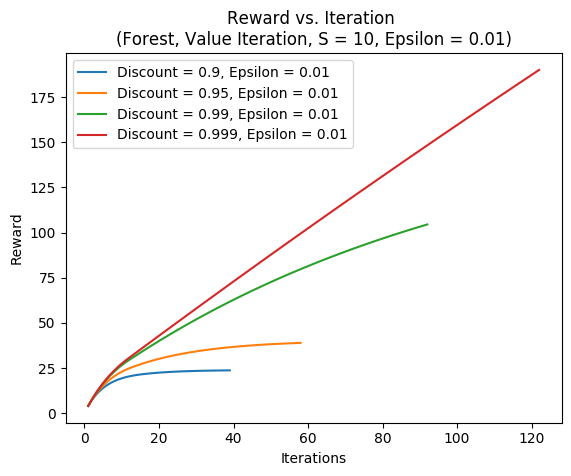

[4.0, 7.24, 9.9373, 12.128674000000002, 13.957421530000001, 15.448326111400002, 16.695997055833, 17.71722627268954, 18.574565228232032, 19.279461561421606, 19.873342709762035, 20.364068147615818, 20.779132227325263, 21.12397397955609, 21.416886635462923, 21.664850965110947, 21.888018861794166, 22.088869968809064, 22.269635965122472, 22.43232536180454, 22.5787458188184, 22.710524230130876, 22.8291248003121, 22.935865313475205, 23.031931775322, 23.118391590984114, 23.196205425080016, 23.26623787576633, 23.32926708138401, 23.385993366439923, 23.437047022990246, 23.482995313885535, 23.524348775691298, 23.56156689131648, 23.595063195379147, 23.625209869035547, 23.652341875326307, 23.676760680987993, 23.698737606083508, 23.718516838669473, 23.73631814799684, 23.75233932639147, 23.766758386946638, 23.77973554144629, 23.791414980495976, 23.80192647564069, 23.811386821270936, 23.819901132338156, 23.827564012298655, 23.834460604263104]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

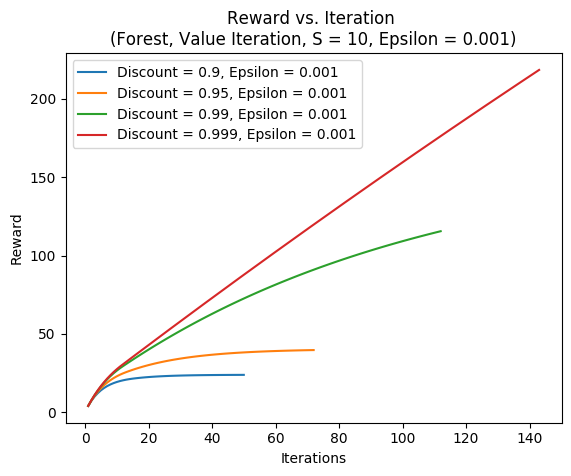

[4.0, 7.24, 9.9373, 12.128674000000002, 13.957421530000001, 15.448326111400002, 16.695997055833, 17.71722627268954, 18.574565228232032, 19.279461561421606, 19.873342709762035, 20.364068147615818, 20.779132227325263, 21.12397397955609, 21.416886635462923, 21.664850965110947, 21.888018861794166, 22.088869968809064, 22.269635965122472, 22.43232536180454, 22.5787458188184, 22.710524230130876, 22.8291248003121, 22.935865313475205, 23.031931775322]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[4.0, 7.42, 10.425324999999999, 13.00259425, 15.272867520624999, 17.22655605848125, 18.95234084629614, 20.44338636633094, 21.764686029659337, 22.911400027817994, 23.93118943873409, 24.820658047542906, 25.614782009547483, 26.353251068468992, 27.054796674444425, 27.72126500012109, 28.35440990951392, 28.95589757343711, 29.52731085416414, 30.070153470854816, 30.58585395671096, 31.075769418274298, 31.54118910675947, 31.98333781082038, 32.403379079678245, 32.8024

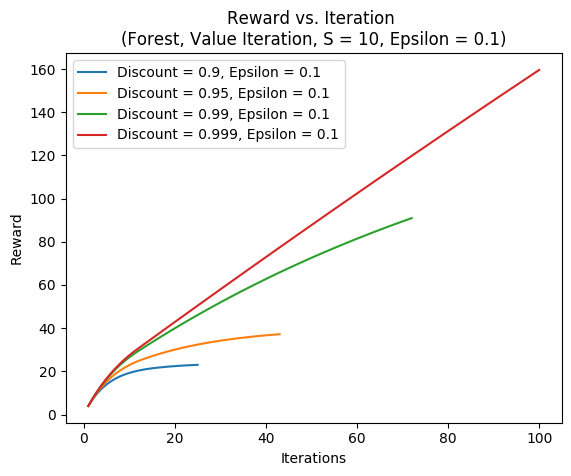

In [307]:
# FOREST: VALUE ITERATION (10)
# https://edstem.org/us/courses/25926/discussion/2181190
def print_large_policy(policy):
    action_map = {0: "W", 1: "C"}
    out = []
    out.append(action_map[policy[0]])
    act = policy[1]
    out.append(action_map[policy[1]])
    for i in range(2, len(policy)-11):
        if act == policy[i]:
            continue
        else:
            out.append("...")
            out.append(action_map[policy[i]])
            act = policy[i]
    n = len(policy)
    out.append("...")
    for i in range(len(policy)-11, len(policy)):
        out.append(action_map[policy[i]])
        
    print(" ".join(out))

np.random.seed(0)
P, R = example.forest(S=10)
print(P)
print(R)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        print_large_policy(vi.policy)
        forest_vi_10_time = vi.time
        print("FOREST (10) VI TIME: ", forest_vi_10_time)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

[4.0, 7.24, 9.9373, 12.128674000000002, 13.957421530000001, 15.448326111400002, 16.695997055833, 17.71722627268954, 18.574565228232032, 19.279461561421606, 19.873342709762035, 20.364068147615818, 20.779132227325263, 21.12397397955609, 21.416886635462923, 21.66166751099009, 21.870524686230226, 22.046134882193297, 22.19667459204508, 22.32405010707551, 22.433761109622417, 22.52717989405572, 22.6080242209464, 22.677292929720778, 22.737513872470668, 22.789422154186763, 22.834748088425272, 22.874038588389475, 22.90848706254061, 22.938504675394643, 22.96492152352997, 22.988049763143795, 23.008472172643646, 23.026427894548714, 23.04233019292656, 23.05636378202297, 23.06882483594772, 23.07985707411701, 23.089675091923866]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
[4.0, 7.42, 10.425324999999999, 13.00259425, 15.272867520624999, 17.22655605848125, 18.95234084629614, 20.44338636633094, 21.7646

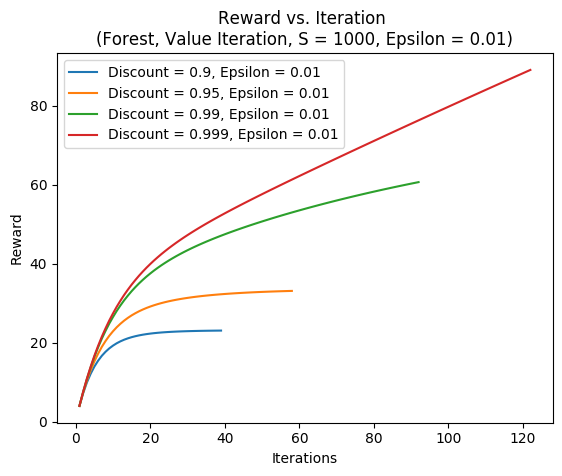

[4.0, 7.24, 9.9373, 12.128674000000002, 13.957421530000001, 15.448326111400002, 16.695997055833, 17.71722627268954, 18.574565228232032, 19.279461561421606, 19.873342709762035, 20.364068147615818, 20.779132227325263, 21.12397397955609, 21.416886635462923, 21.66166751099009, 21.870524686230226, 22.046134882193297, 22.19667459204508, 22.32405010707551, 22.433761109622417, 22.52717989405572, 22.6080242209464, 22.677292929720778, 22.737513872470668, 22.789422154186763, 22.834748088425272, 22.874038588389475, 22.90848706254061, 22.938504675394643, 22.96492152352997, 22.988049763143795, 23.008472172643646, 23.026427894548714, 23.04233019292656, 23.05636378202297, 23.06882483594772, 23.07985707411701, 23.089675091923866, 23.09839143168088, 23.106163312628688, 23.113079354661522, 23.11925601211781, 23.12476340102534, 23.129688702339216, 23.134087616922578, 23.138026072163626, 23.14154846856588, 23.144705130739236, 23.147531552539487]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1

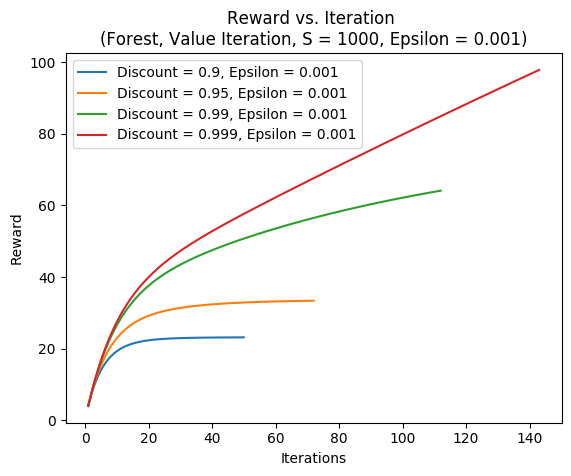

[4.0, 7.24, 9.9373, 12.128674000000002, 13.957421530000001, 15.448326111400002, 16.695997055833, 17.71722627268954, 18.574565228232032, 19.279461561421606, 19.873342709762035, 20.364068147615818, 20.779132227325263, 21.12397397955609, 21.416886635462923, 21.66166751099009, 21.870524686230226, 22.046134882193297, 22.19667459204508, 22.32405010707551, 22.433761109622417, 22.52717989405572]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[4.0, 7.42, 10.425324999999999, 13.00259425, 15.272867520624999, 17.22655605848125, 18.95234084629614, 20.44338636633094, 21.764686029659337, 22.911400027817994, 23.93118943873409, 24.820658047542906, 25.614782009547483, 26.3112065867971, 26.93562180424189, 27.48642179154017, 27.982496326051407, 28.422775716935856, 28.82116789218817, 29.176984958137655, 29.50048333106825, 29.7912450480699, 30.056848465189123, 30.29706466745551, 30.517506417645574, 30.718075528488324, 30.902940767422937, 31.072092769753578, 31.22863830071873

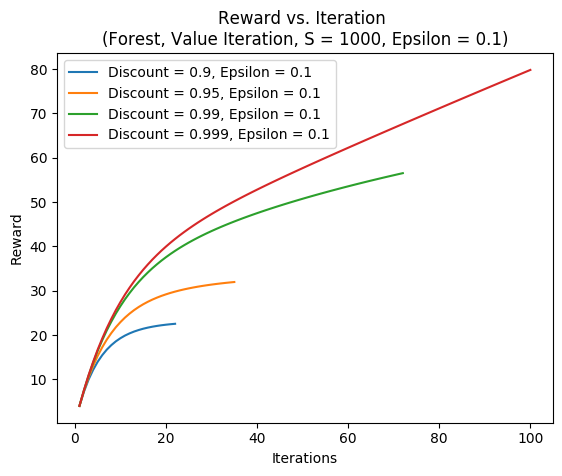

In [313]:
# FOREST: VALUE ITERATION (1000)
np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.01)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.01", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.01))
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.001))
    if discounts[i] == 0.999:
        policy = vi.policy
        print(policy)
        print("COUNTS", "WAIT", policy.count(0), "CUT", policy.count(1))
        print_large_policy(vi.policy)
        forest_vi_1000_time = vi.time
        print("FOREST (1000) VI TIME: ", forest_vi_1000_time)
plt.show()
plt.close()

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.1)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_reward_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.1", 
                           "Discount = " + str(discounts[i]) + ", Epsilon = " + str(0.1))
plt.show()
plt.close()

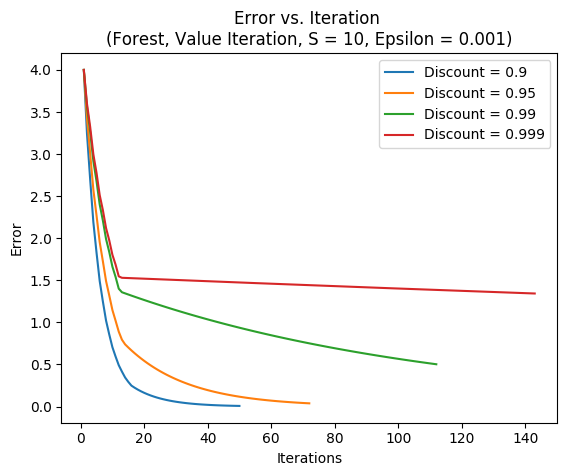

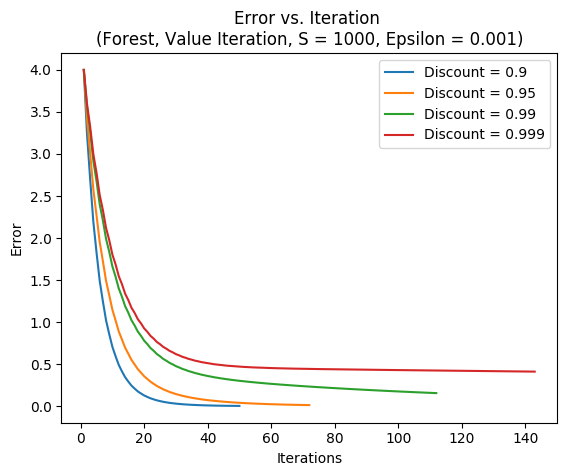

In [230]:
# FOREST: VALUE ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=10)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Forest, Value Iteration, S = 10, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FOREST: VALUE ITERATION (1000) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=1000)

for i in range(len(discounts)):
    vi = mdp.ValueIteration(P, R, discounts[i], epsilon=0.001)
    vi.run()
    vi_run_stats = vi.run_stats
    plot_convergence_iterations(vi_run_stats, "Forest, Value Iteration, S = 1000, Epsilon = 0.001", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

[23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.896435767129265]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 40.384065688322856]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 165.27555059739575]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[508.3644793175274, 508.3644793175274, 508.3644793175274, 508.3644793175274, 508.3644793175274, 508.3644793175274, 508.3644793175274, 508.3644793175274, 1560.142767228184]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
COUNTS WAIT 10 CUT 0
W W ... W W W W W W W W W W W
FOREST (10) PI TIME:  0.38961219787597656


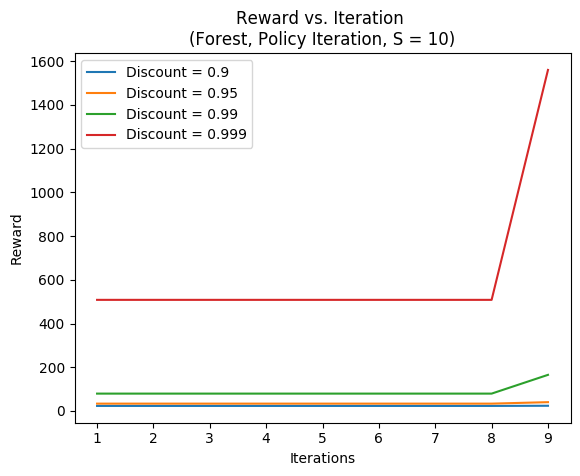

[23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304, 23.17234211944304]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949, 33.62570469132949]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466, 79.49232984724466]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[508.3644793175274, 508.3644793175274, 508.3644793175274, 508.3644793175274, 5

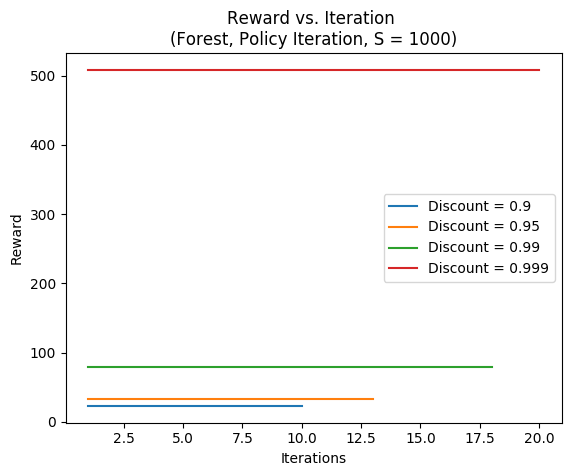

In [312]:
# FOREST: POLICY ITERATION (10)
np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Forest, Policy Iteration, S = 10", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        print(pi.policy)
        print("COUNTS", "WAIT", policy.count(0), "CUT", policy.count(1))
        print_large_policy(pi.policy)
        forest_pi_10_time = pi.time
        print("FOREST (10) PI TIME: ", forest_pi_10_time)
plt.show()
plt.close()

# FOREST: POLICY ITERATION (1000)
np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_reward_iterations(pi_run_stats, "Forest, Policy Iteration, S = 1000", 
                           "Discount = " + str(discounts[i]))
    if discounts[i] == 0.999:
        policy = pi.policy
        print(pi.policy)
        print("COUNTS", "WAIT", policy.count(0), "CUT", policy.count(1))
        print_large_policy(pi.policy)
        forest_pi_1000_time = pi.time
        print("FOREST (1000) PI TIME: ", forest_pi_1000_time)
plt.show()
plt.close()

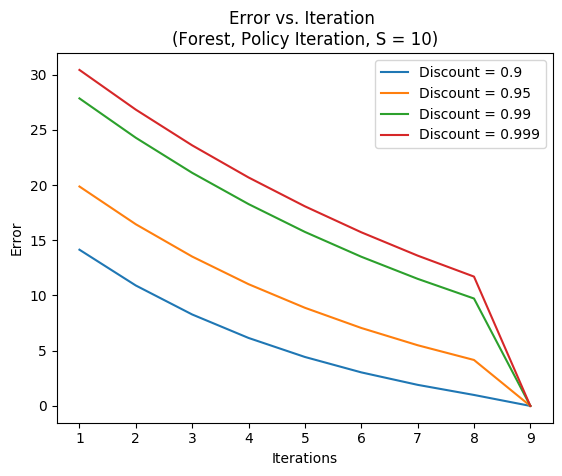

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

(0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

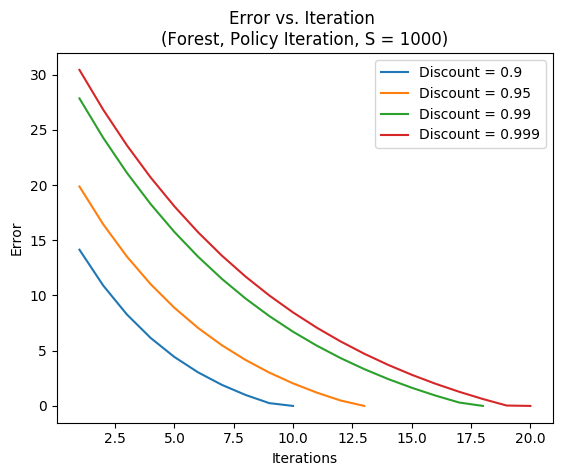

In [256]:
# FOREST: POLICY ITERATION (10) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Forest, Policy Iteration, S = 10", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

# FOREST: POLICY ITERATION (1000) CONVERGENCE PLOT
np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    pi = mdp.PolicyIteration(P, R, discounts[i], eval_type=1)
    pi.run()
    print(pi.policy)
    pi_run_stats = pi.run_stats
    plot_convergence_iterations(pi_run_stats, "Forest, Policy Iteration, S = 1000", 
                           "Discount = " + str(discounts[i]))
plt.show()
plt.close()

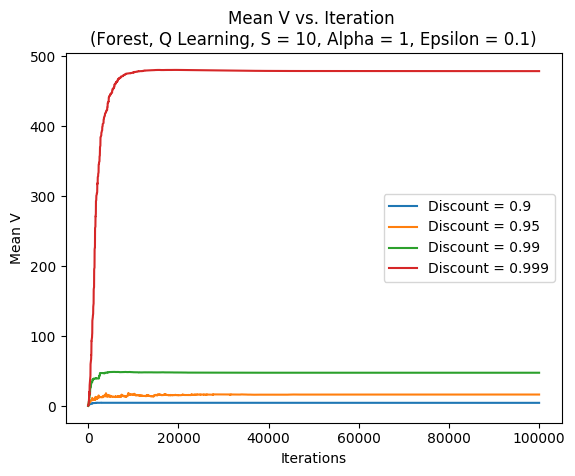

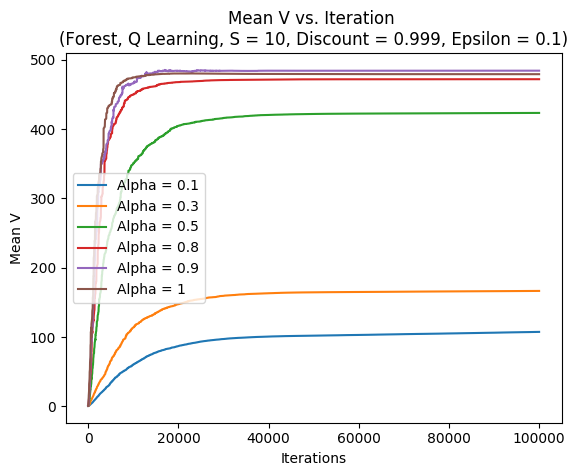

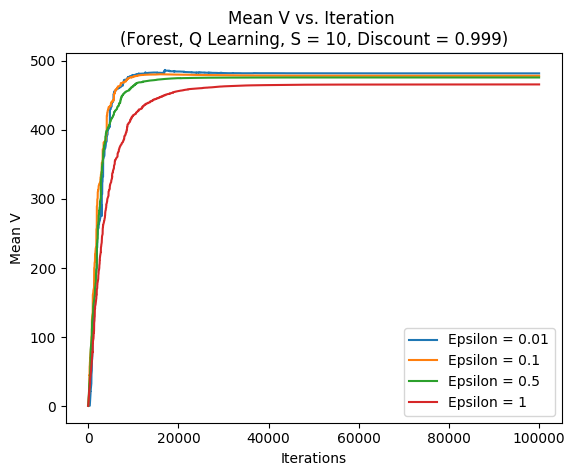

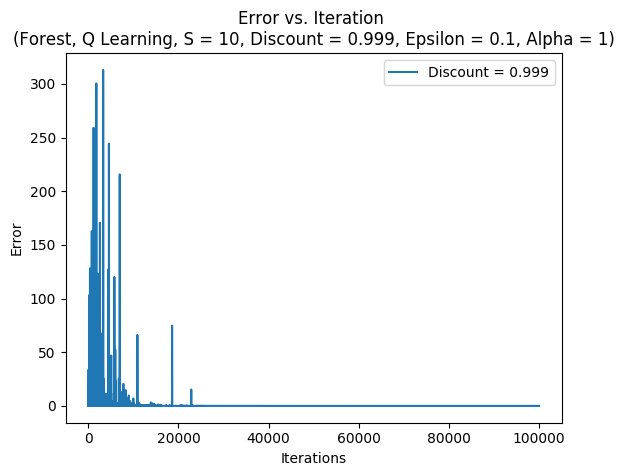

[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0,

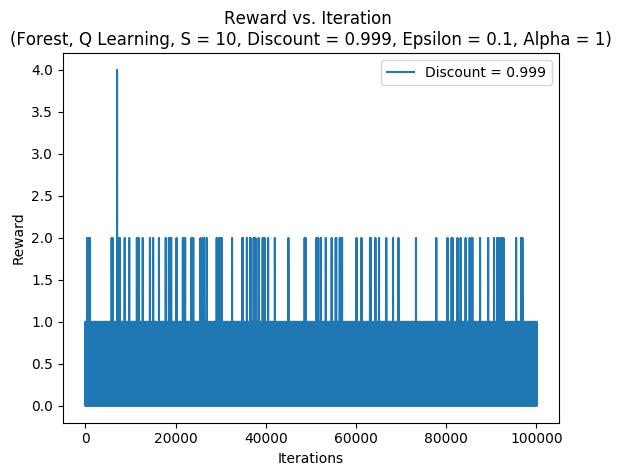

(0, 1, 1, 0, 0, 0, 1, 0, 1, 1)
COUNTS WAIT 5 CUT 5
W C ... C W C C W W W C W C C
FOREST (10) QL TIME:  2.648547887802124


In [315]:
# FOREST: Q LEARNING (10)

np.random.seed(0)
P, R = example.forest(S=10)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=0.1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 10, Alpha = 1, Epsilon = 0.1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=0.1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 10, Discount = 0.999, Epsilon = 0.1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

epsilons = [0.01, 0.1, 0.5, 1]
for i in range(len(epsilons)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=epsilons[i], epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 10, Discount = 0.999)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Epsilon = " + str(epsilons[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=0.1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 1, alpha_min=0.01, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.rand(ql.S, ql.A)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Forest, Q Learning, S = 10, Discount = 0.999, Epsilon = 0.1, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Forest, Q Learning, S = 10, Discount = 0.999, Epsilon = 0.1, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
print(policy)
print("COUNTS", "WAIT", policy.count(0), "CUT", policy.count(1))
print_large_policy(ql.policy)
forest_ql_10_time = ql.time
print("FOREST (10) QL TIME: ", forest_ql_10_time)

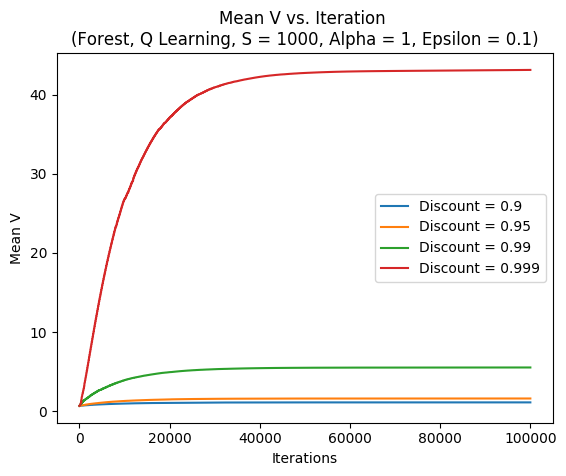

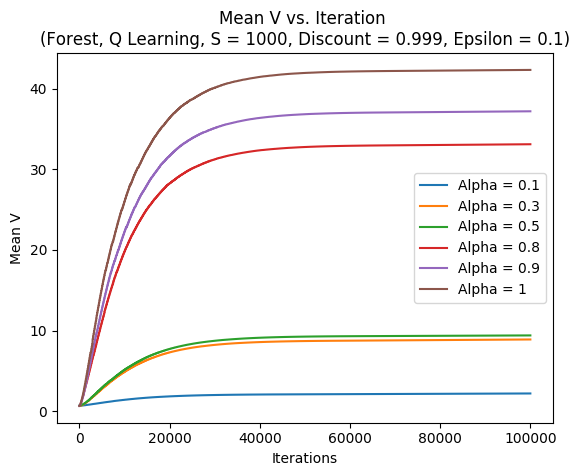

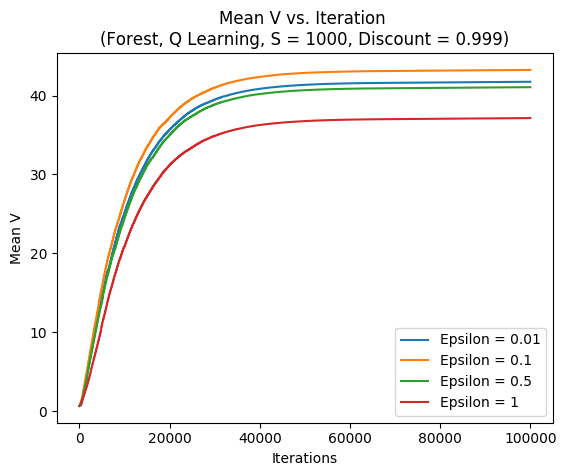

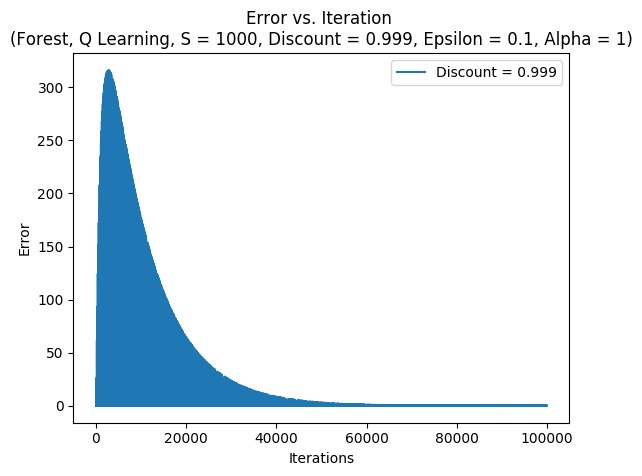

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

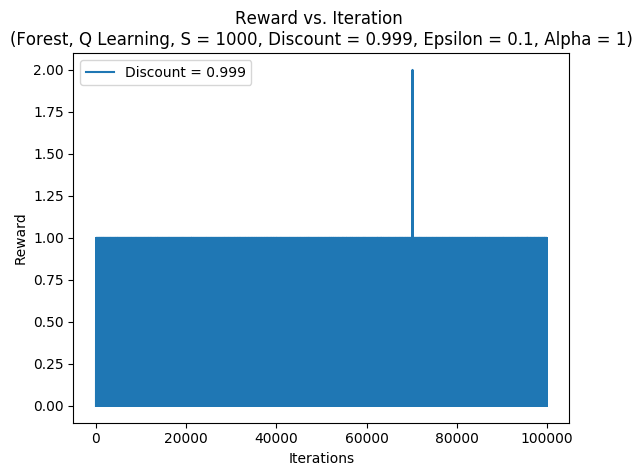

(0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 

In [314]:
# FOREST: Q LEARNING (1000)

np.random.seed(0)
P, R = example.forest(S=1000)

discounts = [0.9, 0.95, 0.99, 0.999]
for i in range(len(discounts)):
    ql = mdp.QLearning(P, R, discounts[i], n_iter=100000,
                   epsilon=0.1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 1000, Alpha = 1, Epsilon = 0.1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Discount = " + str(discounts[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

alphas = [0.1, 0.3, 0.5, 0.8, 0.9, 1]
for i in range(len(alphas)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=0.1, epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = alphas[i], alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 1000, Discount = 0.999, Epsilon = 0.1)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Alpha = " + str(alphas[i]))
    plt.legend(loc='best')
plt.show()
plt.close()

epsilons = [0.01, 0.1, 0.5, 1]
for i in range(len(epsilons)):
    ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
                   epsilon=epsilons[i], epsilon_decay=0.9999, epsilon_min=0.001,
                   alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
    # Randomly intialize Q
    ql.Q = np.random.rand(ql.S, ql.A)
    ql.run()
    ql_run_stats = ql.run_stats
    iterations = [stat['Iteration'] for stat in ql_run_stats]
    mean_v = [stat['Mean V'] for stat in ql_run_stats]
    plt.title("Mean V vs. Iteration \n(Forest, Q Learning, S = 1000, Discount = 0.999)")
    plt.xlabel("Iterations")
    plt.ylabel("Mean V")
    plt.plot(iterations, mean_v, label="Epsilon = " + str(epsilons[i]))
    plt.legend(loc='best')
plt.show()
plt.close()


ql = mdp.QLearning(P, R, 0.999, n_iter=100000,
               epsilon=0.1, epsilon_decay=0.9999, epsilon_min=0.001,
               alpha_decay=0.9999, alpha = 1, alpha_min=0.001, run_stat_frequency=1)
# Randomly intialize Q
ql.Q = np.random.rand(ql.S, ql.A)
ql.run()
ql_run_stats = ql.run_stats
plot_convergence_iterations(ql_run_stats, "Forest, Q Learning, S = 1000, Discount = 0.999, Epsilon = 0.1, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

plot_reward_iterations(ql_run_stats, "Forest, Q Learning, S = 1000, Discount = 0.999, Epsilon = 0.1, Alpha = 1", 
                           "Discount = " + str(0.999))
plt.show()
plt.close()

policy = ql.policy
print(policy)
print("COUNTS", "WAIT", policy.count(0), "CUT", policy.count(1))
print_large_policy(ql.policy)
forest_ql_1000_time = ql.time
print("FOREST (1000) QL TIME: ", forest_ql_1000_time)

In [254]:
print("FOREST (10) VI TIME: ", forest_vi_10_time)
print("FOREST (1000) VI TIME: ", forest_vi_1000_time)
print("FOREST (10) PI TIME: ", forest_pi_10_time)
print("FOREST (1000) PI TIME: ", forest_pi_1000_time)
print("FOREST (10) QL TIME: ", forest_ql_10_time)
print("FOREST (1000) QL TIME: ", forest_ql_1000_time)

FOREST (10) VI TIME:  0.004441976547241211
FOREST (1000) VI TIME:  0.09621095657348633
FOREST (10) PI TIME:  0.38980698585510254
FOREST (1000) PI TIME:  54.03769493103027
FOREST (10) QL TIME:  2.7249062061309814
FOREST (1000) QL TIME:  7.591078042984009


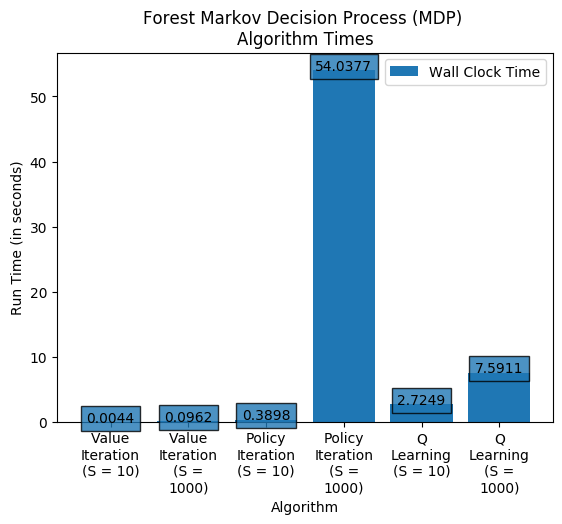

In [255]:
from textwrap import wrap

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',
                 Bbox = dict(alpha =.8))

algorithms = ['Value Iteration (S = 10)', 'Value Iteration (S = 1000)','Policy Iteration (S = 10)', 'Policy Iteration (S = 1000)', 'Q Learning (S = 10)','Q Learning (S = 1000)']
times = [forest_vi_10_time, forest_vi_1000_time, forest_pi_10_time, forest_pi_1000_time, forest_ql_10_time, forest_ql_1000_time]
rounded_times = [round(i, 4) for i in times]
algorithms = ['\n'.join(wrap(x, 9)) for x in algorithms]
plt.title("Forest Markov Decision Process (MDP) \nAlgorithm Times")
plt.xlabel("Algorithm")
plt.ylabel("Run Time (in seconds)")
plt.bar(algorithms, rounded_times, label="Wall Clock Time")
addlabels(algorithms, rounded_times)
plt.legend(loc="best")
plt.show()